# <Forest cover type 분류>

In [2]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

### 1. 데이터 내용 확인

In [3]:
# 데이터 로딩
train_df = pd.read_csv('C:/Users/user/Desktop/과제/데이터마이닝/기말프로젝트/forest-cover-type/train.csv')
test_df = pd.read_csv('C:/Users/user/Desktop/과제/데이터마이닝/기말프로젝트/forest-cover-type/test.csv')
combine = [train_df, test_df]

In [4]:
#coulme명 확인
print(train_df.columns.values)

['Id' 'Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area' 'Soil_Type'
 'Cover_Type']


In [5]:
train_df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,29,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,29,2
6,7,2606,45,7,270,5,633,222,225,138,6256,1,29,5
7,8,2605,49,4,234,7,573,222,230,144,6228,1,29,5
8,9,2617,45,9,240,56,666,223,221,133,6244,1,29,5
9,10,2612,59,10,247,11,636,228,219,124,6230,1,29,5


In [6]:
train_df.tail(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
15110,15111,2508,33,26,67,1,644,204,173,91,1385,3,10,6
15111,15112,2610,59,17,60,10,674,231,202,98,1328,3,10,6
15112,15113,2600,38,25,124,0,589,212,178,89,1261,3,10,6
15113,15114,2688,104,15,443,10,805,245,219,99,1266,3,11,3
15114,15115,2670,108,12,624,24,730,241,225,112,1231,3,11,3
15115,15116,2607,243,23,258,7,660,170,251,214,1282,3,4,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,3,4,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,3,4,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,3,4,3
15119,15120,2475,197,34,319,78,270,189,244,164,914,3,2,3


In [7]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area                     15120 non-null  int64
 12  Soil

In [8]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,2.800397,19.171362,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,1.119832,12.626960,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000,10.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,3.000000,17.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,4.000000,30.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,4.000000,40.000000,7.000000


### 2. Missing Value 확인 및 처리

In [9]:
train_df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type                             0
Cover_Type                            0
dtype: int64

In [10]:
test_df.isnull().sum()

Id                                      0
Elevation                               0
Aspect                                  4
Slope                                   0
Horizontal_Distance_To_Hydrology        0
Vertical_Distance_To_Hydrology          0
Horizontal_Distance_To_Roadways         0
Hillshade_9am                           0
Hillshade_Noon                          0
Hillshade_3pm                           0
Horizontal_Distance_To_Fire_Points      0
Wilderness_Area                         0
Soil_Type                             229
dtype: int64

#### test 데이터에 missing Value 존재(Aspect, Soli_type)

In [11]:
#Soil_type의 missing value가 차지하는 비율 확인
sum(pd.isnull(test_df['Soil_Type']))/len(test_df["Id"]) * 100

0.04046708559230383

#### Aspect와 Soil_type의 missing Value는 극히 일부이므로 값 채워넣기

In [12]:
#Aspect은 수치값이고, 누락값의 개수도 적으므로 평균값으로
test_df['Aspect'].mean(skipna=True)

155.63031907373897

In [13]:
#Soil_type은 카테고리값(1~40)이므로, 개수가 가장 많은 카테고리로
test_df[["Soil_Type", "Id"]].groupby(["Soil_Type"]).count().sort_values(by='Id', ascending=False).head(10)

,Id
Soil_Type,
29.0,113883
23.0,56960
32.0,51794
33.0,44526
22.0,33025
10.0,30482
12.0,29738
30.0,29435
31.0,25327


#### Aspect의 누락값은 155로, Soil_Type 누락값은 29로 채우겠다.

In [14]:
test_df["Aspect"].fillna(155, inplace=True)
test_df["Soil_Type"].fillna(29, inplace=True)

In [15]:
#missing Value 다시 확인
test_df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64

### 3. 데이터 속성별 시각화

#### (1) 데이터속성과 클래스 간의 관계 시각화

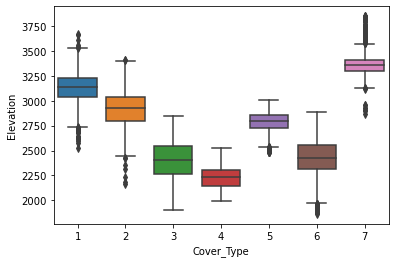

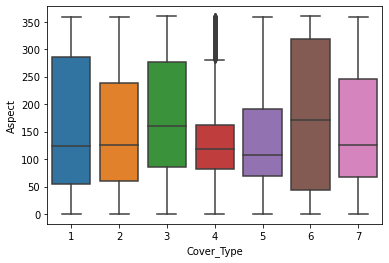

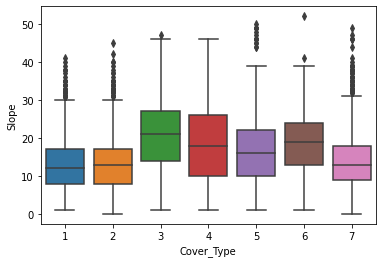

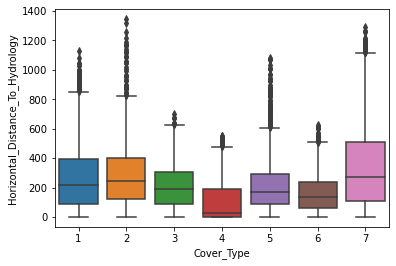

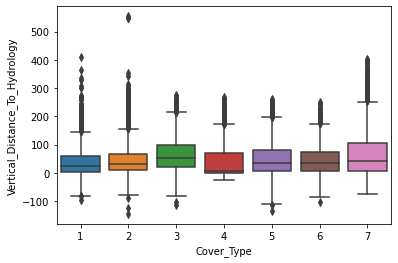

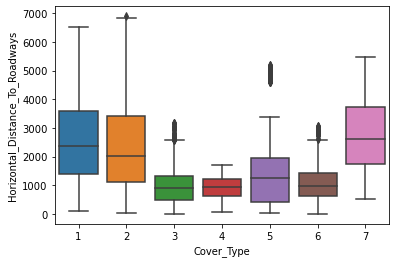

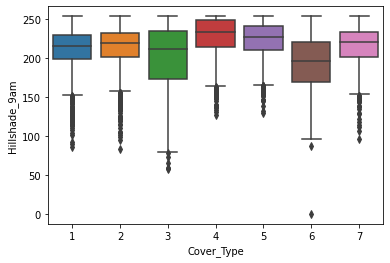

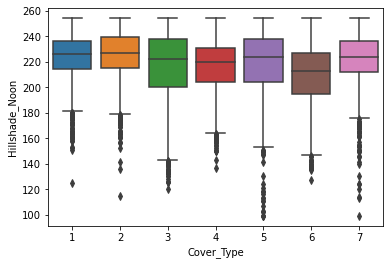

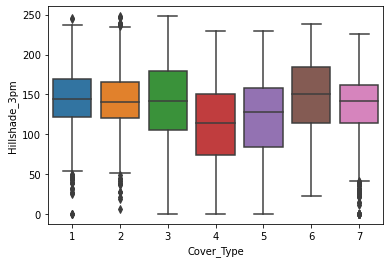

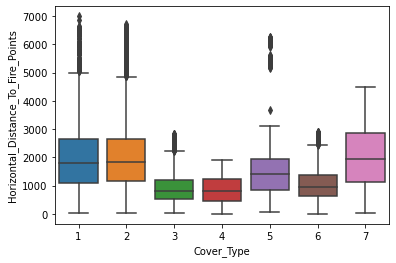

In [16]:
cols = train_df.columns
count = len(cols) - 3  #카테고리 속성인 Wilderness_Area와 Soil_Type, 클래스인 Cover_Type 제거
x = cols[-1]
y = cols[0:count]

for i in range(1, count):
    sns.boxplot(x=x, y=y[i], data=train_df)
    plt.show()

- Elevation의 값에 따라 Cover_Type이 극단적으로 달라지는 것을 알 수 있다.
- Elevation만큼은 아니지만 Aspect와 Slope도 Cover_Type별로 값이 다른 것을 알 수 있다.
- Distance나 Hillshade 속성은 값에 따라 Cover_Type이 크게 차이가 나지 않아 보인다.
* 다만, Distance는 Hydrology, Roadway, fire point로, Hillshade는 9am, noon, 3pm으로 속성의 종류가 여러가지다.
  그러므로 각 속성 간의 관계에 의해 Cover_Type이 달라지지는 않는지 살펴보겠다.

#### (2) 속성 간의 상관관계 시각화

In [17]:
# 속성간 상관관계 알아보기
# 여기서도 마찬가지로 카테고리 속성인 Wilderness_Area와 Soil_Type, 클래스인 Cover_Type는 제거
index_list = list(train_df.corr().index)
index_list.remove('Wilderness_Area')
index_list.remove('Soil_Type')
index_list.remove('Cover_Type')

corr_list = []
for row_num, row in enumerate(index_list):
    for col_num, col in enumerate(index_list):
        if (col_num == row_num) | (col_num > row_num): continue  #중복방지용
        corr_list.append([row, col, np.abs(train_df.corr().iloc[row_num, col_num])])
            
corr_array = np.array(corr_list)
corr_array = corr_array[corr_array[:,2].argsort()[::-1]]
corr_array[:10]

array([['Hillshade_3pm', 'Hillshade_9am', '0.779964742447544'],
       ['Vertical_Distance_To_Hydrology',
        'Horizontal_Distance_To_Hydrology', '0.6521424712357364'],
       ['Hillshade_3pm', 'Aspect', '0.635022364019874'],
       ['Hillshade_3pm', 'Hillshade_Noon', '0.6145263872475779'],
       ['Hillshade_Noon', 'Slope', '0.6126128724172692'],
       ['Hillshade_9am', 'Aspect', '0.5939974281313112'],
       ['Horizontal_Distance_To_Roadways', 'Elevation',
        '0.5786589907340067'],
       ['Horizontal_Distance_To_Fire_Points',
        'Horizontal_Distance_To_Roadways', '0.48638564505875065'],
       ['Horizontal_Distance_To_Fire_Points', 'Elevation',
        '0.4435634307597476'],
       ['Horizontal_Distance_To_Hydrology', 'Elevation',
        '0.4127115202982467']], dtype='<U34')

#### 상관관계가 가장 높게 나오는 속성들이다. 이들이 어떤 관계가 있는지 그래프로 살펴보겠다.

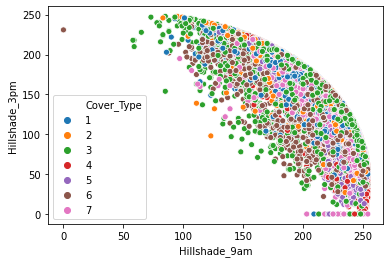

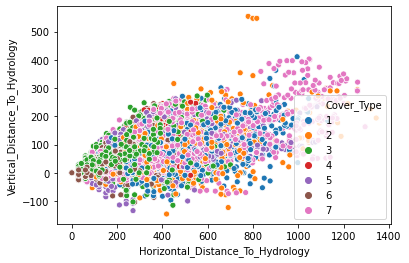

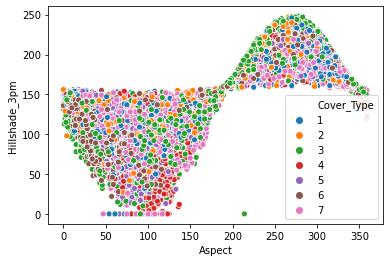

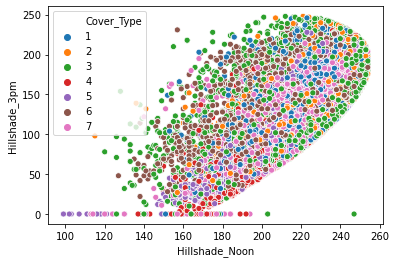

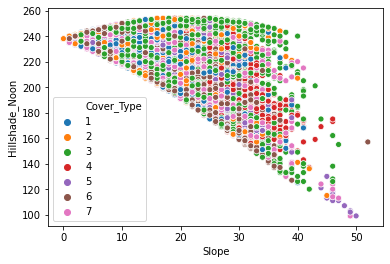

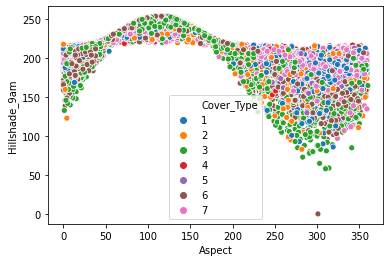

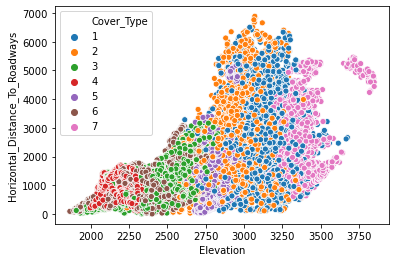

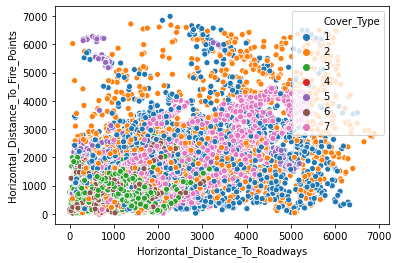

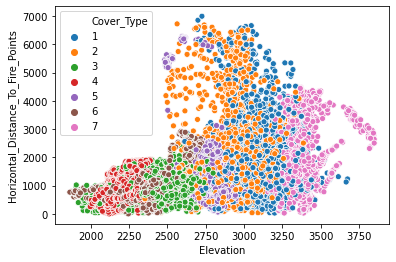

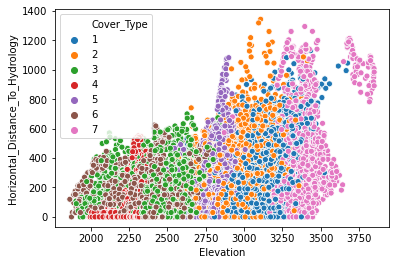

In [18]:
for x, y, z in corr_array[:10]:
    sns.scatterplot(x = y, y = x, data = train_df, hue = 'Cover_Type', legend = 'full', palette='tab10')
    plt.show()

- Elevation과 Distance간의 관계 그래프를 보면 클래스가 한눈에 보일정도로 분류가 되어있다.
- 시간대별 Hillshade간의 관계 그래프는 클래스가 비교적 골고루 분포되어있다. 하지만 Ponderosa Pine은 그림자가 가장 짙거나 가장 얕은 축에 주로 분포되어있고, Douglas-fir과 Krummholz는 그 가운데에 밀집되어있는 것으로 보인다.
- Slope, Aspect와 Hillshade간에도 각 클래스별 밀집구간들이 어느정도 있어보인다. 또한 각도와 기울기에 따라 그림자 밝기가 극명히 차이나는 것을 확인할 수 있다.
- 이렇게 속성 간의 관계에 따른 그래프를 확인해보니 Elevation, Aspect, Slope 각각의 속성 뿐만 아니라 다른 수치값 속성들도 클래스 분류에 영향을 미치는 것으로 판단되므로, 속성 제거나 조정 없이 입력데이터의 값을 그대로 이용하기로 한다.

#### (3) 카테고리 속성에 대한 시각화

#### 우선 시각화하기에 앞서 카테고리 속성을 0과 1의 값을 가질 수 있도록 분리하겠다.

In [19]:
train_df2 = pd.get_dummies(train_df, columns=["Wilderness_Area"])
train_df3 = pd.get_dummies(train_df2, columns=["Soil_Type"])

train_df3.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


#### 이제 Wilderness_Area와 Cover_Type간의 관계를 살펴보겠다.

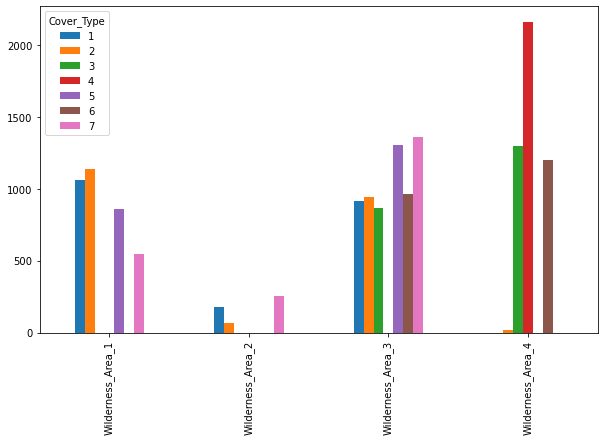

In [20]:
graph = train_df3.groupby(['Cover_Type'])[['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']].sum()
graph.T.plot(kind = 'bar', figsize = (10,6))
plt.show()

- 이 그래프를 통해 확실하게 알 수 있는 것은 Wilderness_Area4의 속성을 갖는 Cover Type은 Cottonwood/Willow라는 것이다.
- 그 외에도 Type3과 6은 Area3과 4를, Type5는 Area1과 3을 갖는 등 속성별로 클래스가 대체로 구분된다.
- Wilderness_Area2를 갖는 클래스는 다른 Area에 비해 적지만, 전체 개수가 적은 개수는 아니므로 남겨두도록 하겠다.

#### 다음은 Soil_Type과 Cover_Type의 관계다.

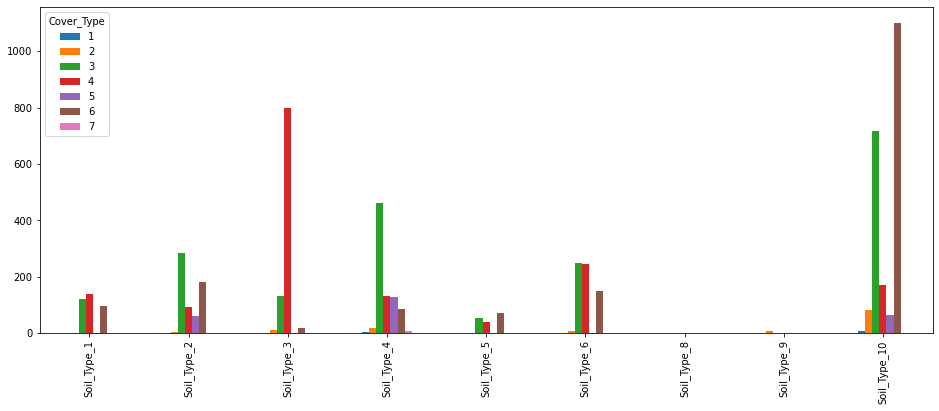

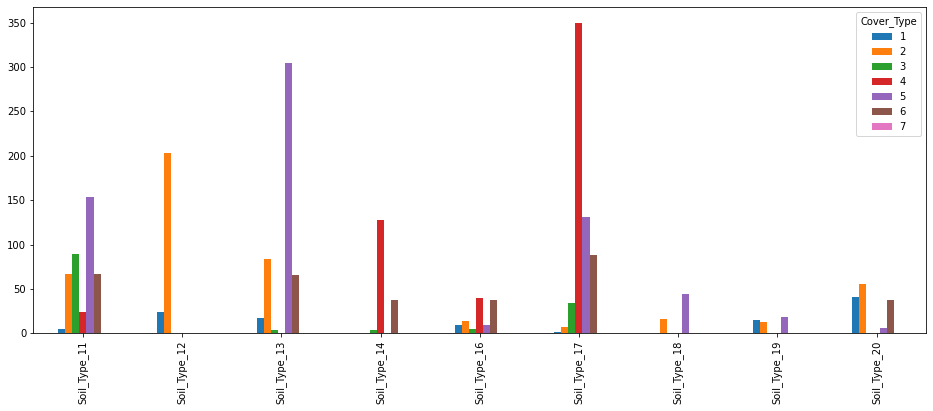

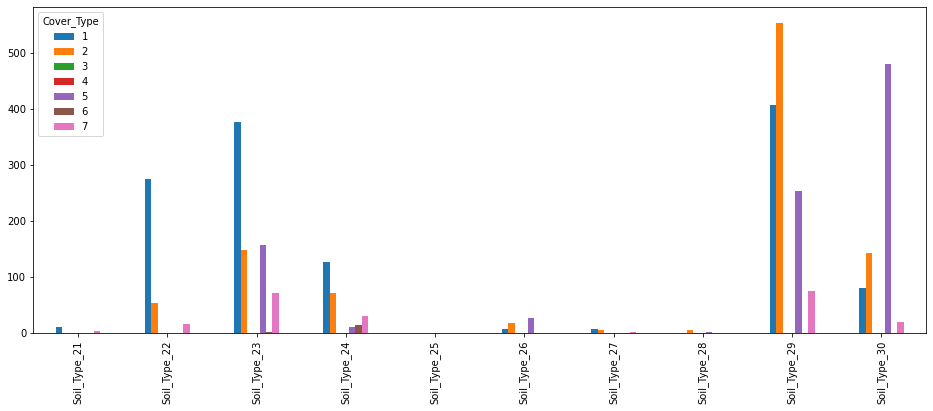

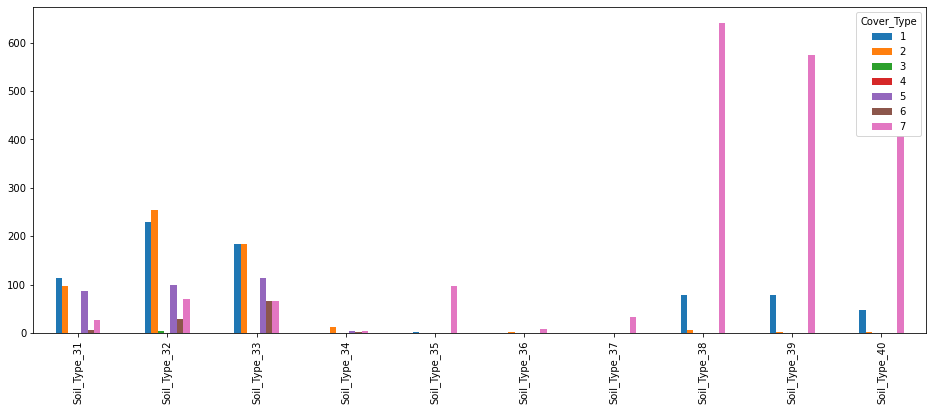

In [21]:
#Soil_Type 인덱스 묶기
Total_index = list(train_df3.columns)
Soil_index = []
Soil_index.append(Total_index[16:25])  #Soil_Type_1~10까지
Soil_index.append(Total_index[25:34])  #Soil_Type_11~20까지
Soil_index.append(Total_index[34:44])  #Soil_Type_21~30까지
Soil_index.append(Total_index[44:])    #Soil_Type_31~40까지

#Soil_Type에 대한 시각화
for i in Soil_index:
    graph = train_df3.groupby(['Cover_Type'])[i].sum()
    graph.T.plot(kind = 'bar', figsize = (16,6))
    plt.show()

- Soil_Type이 앞쪽일수록 Cover_Type3,4,6이 많다.
- Soil_Type이 뒤쪽일수록 Cover_Type1,7이 많다.
- Cover_Type2와 5는 골고루 분포되어있다.
- Soil_Type7과 15는 아예 빠져있다. 즉 이 Type을 가지는 Cover_Type은 train 데이터에서 아예 없다는 뜻이므로 test에서도 제거하기로 하겠다.
- Soil_Type8과 25를 가지는 Cover_Type은 막대그래프가 보이지 않을 정도로 수가 적으므로 제거하기로 하겠다.

### 4. 데이터 전처리

#### 1. Cover_Type은 우리가 예측해야하는 값
#### 2. test데이터의 카테고리 속성도 0과 1의 값을 가지도록 분리한다.
#### 3. train데이터에서는 Soil_Type 8과 25 제거, test데이터에서는 Soil_Type 7,8,15,25를 제거한다.
#### 4. 샘플별로 값이 다른 id를 train과 test데이터에서 모두 제거한다.
#### 5. 나머지 속성은 그대로 채택

In [22]:
#test데이터 카테고리속성 분리
test_df2 = pd.get_dummies(test_df, columns=["Wilderness_Area"])
test_df3 = pd.get_dummies(test_df2, columns=["Soil_Type"])

In [23]:
#속성 제거

train_df3.drop('Id', axis=1, inplace=True)
train_df3.drop('Soil_Type_8', axis=1, inplace=True)
train_df3.drop('Soil_Type_25', axis=1, inplace=True)

test_df3.drop('Soil_Type_7.0', axis=1, inplace=True)
test_df3.drop('Soil_Type_8.0', axis=1, inplace=True)
test_df3.drop('Soil_Type_15.0', axis=1, inplace=True)
test_df3.drop('Soil_Type_25.0', axis=1, inplace=True)
test_df4 = test_df3.drop('Id', axis=1).copy() # submission 저장시 Id 인덱스가 필요하므로 카피

In [24]:
train_df3.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_df4.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31.0,Soil_Type_32.0,Soil_Type_33.0,Soil_Type_34.0,Soil_Type_35.0,Soil_Type_36.0,Soil_Type_37.0,Soil_Type_38.0,Soil_Type_39.0,Soil_Type_40.0
0,2680,354.0,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0.0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16.0,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24.0,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29.0,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


### 5. 기계학습을 통해 Cover_Type 예측 및 정확도 측정

In [26]:
# 학습 집합과 테스트 집합 준비
X_train = train_df3.drop("Cover_Type", axis=1)
Y_train = train_df3["Cover_Type"]
X_test = test_df4
X_train.shape, Y_train.shape, X_test.shape

((15120, 50), (15120,), (565892, 50))

In [27]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


#### (1) Logistic Regression

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

c:\users\user\pycharmprojects\test1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


47.9

#### (2) Support Vector Machines

In [29]:
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

100.0

#### (3) K-Nearest Neighbor

In [30]:
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

92.12

#### (4) Decision Tree

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

#### (5) Artificial Neural Network

In [32]:
#hidden 레이어를 30,20,10으로 줬을때
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(30,20,10), random_state=1)
ANN.fit(X_train, Y_train)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

14.66

In [33]:
#hidden 레이어를 10,30으로 줬을때
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(20,5), random_state=1)
ANN.fit(X_train, Y_train)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN


14.29

#### Logistic Regression과 ANN으로 학습 시 정확도는 매우 낮다.
#### K-Nearest Neighbor로 학습 시에는 정확도가 상당히 높게 나왔다.
### SVM과 Decision Tree로 하니 정확도가 100% 나왔다!

### 6. Confusion Matrix로 비교

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
#SVM
Y_pred_svc_train = svc.predict(X_train)
CM1 = confusion_matrix(Y_train, Y_pred_svc_train)
CM1

array([[2160,    0,    0,    0,    0,    0,    0],
       [   0, 2160,    0,    0,    0,    0,    0],
       [   0,    0, 2160,    0,    0,    0,    0],
       [   0,    0,    0, 2160,    0,    0,    0],
       [   0,    0,    0,    0, 2160,    0,    0],
       [   0,    0,    0,    0,    0, 2160,    0],
       [   0,    0,    0,    0,    0,    0, 2160]], dtype=int64)

In [36]:
#Decision Tree
Y_pred_DT_train = decision_tree.predict(X_train)
CM2 = confusion_matrix(Y_train, Y_pred_DT_train)
CM2

array([[2160,    0,    0,    0,    0,    0,    0],
       [   0, 2160,    0,    0,    0,    0,    0],
       [   0,    0, 2160,    0,    0,    0,    0],
       [   0,    0,    0, 2160,    0,    0,    0],
       [   0,    0,    0,    0, 2160,    0,    0],
       [   0,    0,    0,    0,    0, 2160,    0],
       [   0,    0,    0,    0,    0,    0, 2160]], dtype=int64)

In [37]:
#K-nearest Neighbor
Y_pred_knn_train = knn.predict(X_train)
CM3 = confusion_matrix(Y_train, Y_pred_knn_train)
CM3

array([[1834,  162,    1,    0,   40,    5,  118],
       [ 217, 1702,   46,    2,  132,   47,   14],
       [   0,   10, 1939,   74,   13,  124,    0],
       [   0,    0,    6, 2144,    0,   10,    0],
       [   3,   15,    9,    0, 2131,    2,    0],
       [   1,   10,   65,   44,    9, 2031,    0],
       [   9,    3,    0,    0,    0,    0, 2148]], dtype=int64)

In [38]:
#Logistic Regression
Y_pred_logreg_train = logreg.predict(X_train)
CM4 = confusion_matrix(Y_train, Y_pred_logreg_train)
CM4

array([[ 814,  366,    9,    0,  295,   48,  628],
       [ 370,  905,   84,    9,  388,  170,  234],
       [  20,  152,  893,  533,  198,  349,   15],
       [   0,   13,  260, 1760,   56,   70,    1],
       [  90,  436,  152,   12, 1040,  351,   79],
       [  65,  206,  688,  389,  339,  437,   36],
       [ 613,   92,   12,    0,   49,    0, 1394]], dtype=int64)

In [39]:
#Artifical Neural Network
Y_pred_ANN_train = ANN.predict(X_train)
CM5 = confusion_matrix(Y_train, Y_pred_ANN_train)
CM5

array([[   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160],
       [   0,    0,    0,    0,    0,    0, 2160]], dtype=int64)

### 7. 최종결과 예측 및 저장

#### Decision Tree와 SVM 중 간단하고 SVM에 비해 속도가 빠른 Decision Tree로 최종결과를 예측하도록 하겠다.

In [40]:
Y_pred_DT = decision_tree.predict(X_test)

In [41]:
submission = pd.DataFrame({
        "Id": test_df3["Id"],
        "Cover_Type": Y_pred_DT
    })
submission.head(2000)


,Id,Cover_Type
0,15121,5
1,15122,5
2,15123,5
3,15124,5
4,15125,5
...,...,...
1995,17116,1
1996,17117,1
1997,17118,2
1998,17119,2


In [42]:
submission.to_csv('C:/Users/user/Desktop/과제/데이터마이닝/기말프로젝트/forest-cover-type/submission.csv', index=False)


